In [1]:
%reload_ext autoreload
%autoreload 2

# Imports 

## Third party imports 

In [2]:
import io 
import numpy as np 
import pandas as pd 
import scipy
import matplotlib.pyplot as plt

In [3]:
num_clusters = 3
mean_range = (40,50)
cov_range = (0,0.2)
max_points = 100

In [4]:
data = []
labels = []
np.random.seed(49)
for cluster_id in range(num_clusters):
    mean = np.random.uniform(mean_range[0], mean_range[1], size=2)
    cov = np.diag(np.random.uniform(cov_range[0], cov_range[1], size=2))
    n_points = int(np.random.uniform(int(max_points / 2), max_points))
    cluster_data = np.random.multivariate_normal(mean, cov, n_points)
    data.append(cluster_data)
    labels.extend([cluster_id] * n_points)

    
X = np.vstack(data)

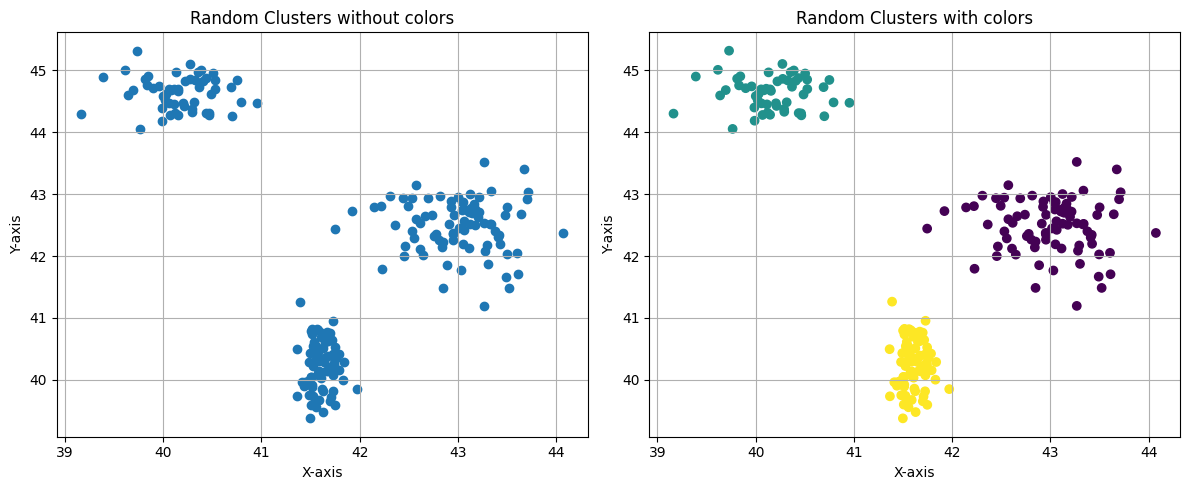

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].set_title("Random Clusters without colors")
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].grid(True)

scatter = axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
axes[1].set_title("Random Clusters with colors")
axes[1].set_xlabel("X-axis")
axes[1].set_ylabel("Y-axis")
axes[1].grid(True)

plt.tight_layout()
plt.show()



# Setup data 

In [6]:
num_clusters = 8
mean_range = (1,15)
cov_range = (0,0.8)
max_points = 100

In [7]:
data = []
labels = []
np.random.seed(42)
for cluster_id in range(num_clusters):
    mean = np.random.uniform(mean_range[0], mean_range[1], size=2)
    cov = np.diag(np.random.uniform(cov_range[0], cov_range[1], size=2))
    n_points = int(np.random.uniform(int(max_points / 2), max_points))
    cluster_data = np.random.multivariate_normal(mean, cov, n_points)
    data.append(cluster_data)
    labels.extend([cluster_id] * n_points)

    
X = np.vstack(data)

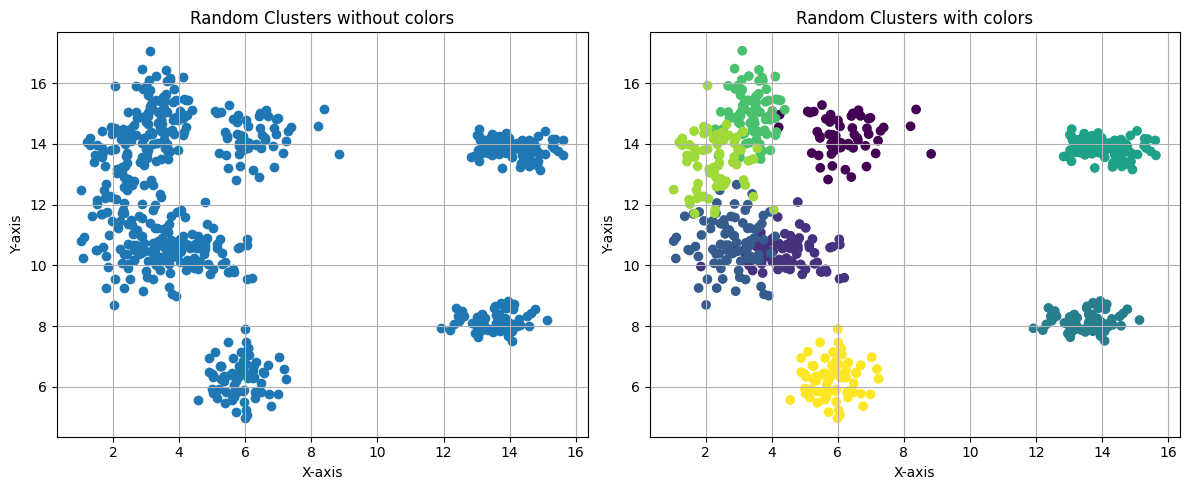

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].set_title("Random Clusters without colors")
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].grid(True)

scatter = axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
axes[1].set_title("Random Clusters with colors")
axes[1].set_xlabel("X-axis")
axes[1].set_ylabel("Y-axis")
axes[1].grid(True)

plt.tight_layout()
plt.show()



# Clustering with k-means 

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d


## Voronoi Tesellation 

In [13]:
def plot_voronoi(km, cluster_colors = None):
    vor = Voronoi(km.cluster_centers_)
    plt.figure(figsize=(12,12),dpi=150)
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=10)
    
    # Plot data points
    if not cluster_colors:
        plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='tab10', s=20, label='Data points')
    else:
        for i in range(optimal_k):
            cluster_points = X[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cluster_colors[i]], s=20, label=f"Cluster {i+1}")
    # Plot cluster centers
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Cluster centers')
    
    # Add labels and legend
    plt.title("Voronoi Tessellation with KMeans Clusters")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    
    plt.xlim(0, 16)
    plt.ylim(4, 18)
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

## Bad choices 

### N_init = 1, N_clusters = 4

Cuando la K es muy pequeña, clusters claramente separados tienden a unirse

In [14]:
km_1_4 = KMeans(n_clusters=4, n_init = 1, max_iter = 10,
            init = 'random', random_state=42).fit(X)

<Figure size 1800x1800 with 0 Axes>

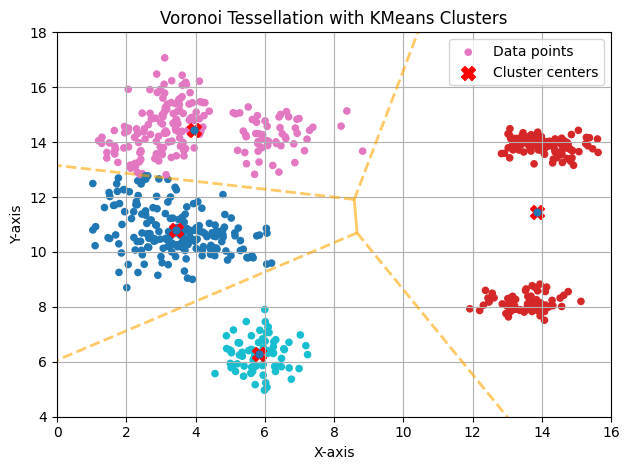

In [15]:
plot_voronoi(km_1_4)

### N_init = 1, N_clusters = 12

Cuando la K es muy grande, clusters claramente delimitados se dividen en varios

In [16]:
km_1_12 = KMeans(n_clusters=12, n_init = 1, max_iter = 10,
            init = 'random', random_state=42).fit(X)

<Figure size 1800x1800 with 0 Axes>

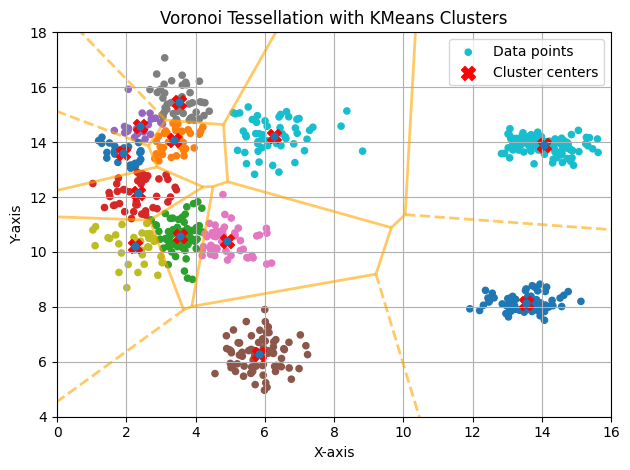

In [17]:
plot_voronoi(km_1_12)

## Good choices for K 

### N_init = 1, N_clusters = 6

In [18]:
km_1_6 = KMeans(n_clusters=6, n_init = 1, max_iter = 10,
            init = 'random', random_state=42).fit(X)

Podemos ver que al hacer solo una iteración el resultado no es muy bueno ya que es facil ver que el cluster pintado de color verde son realmente dos clusters. Como la función que optimiza k-means es no convexa tiene varios mínimos locales. Este es uno de ellos. 
Para poder encontrar el máximo local deberiamos ejecutar muchas veces el algoritmo con difenrentes inicializaciones. 

<Figure size 1800x1800 with 0 Axes>

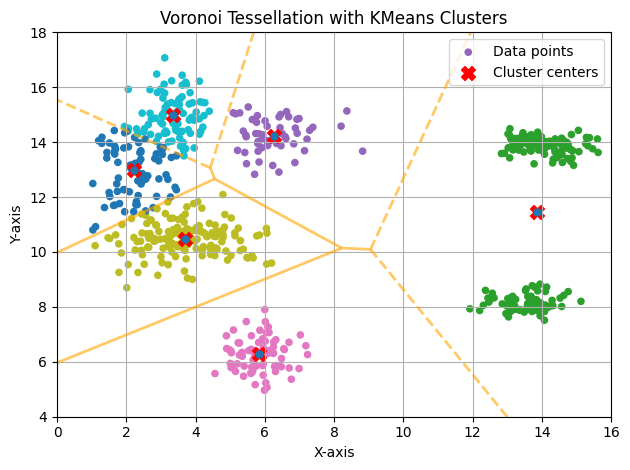

In [19]:
plot_voronoi(km_1_6)

### N_init = 100, N_clusters = 6

Esto tiene mucho mas sentido, para alguien que desconoce el origen de los datos, estos grupos parecen correctos.

In [20]:
km_100_6 = KMeans(n_clusters=6, n_init = 100, max_iter = 10,
            init = 'random', random_state=42).fit(X)

<Figure size 1800x1800 with 0 Axes>

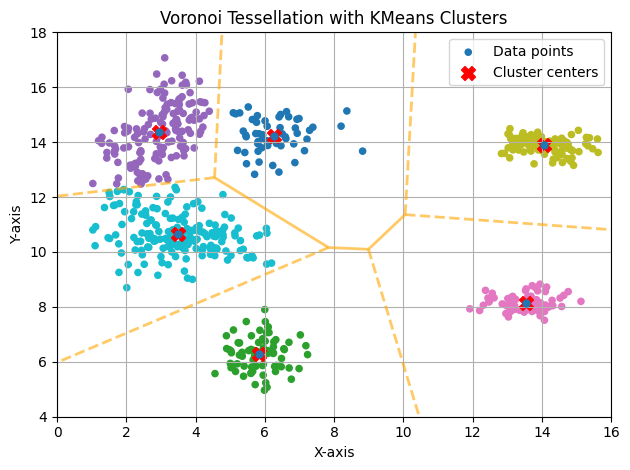

In [21]:
plot_voronoi(km_100_6)

## Finding the optimal K 

### By inertia 

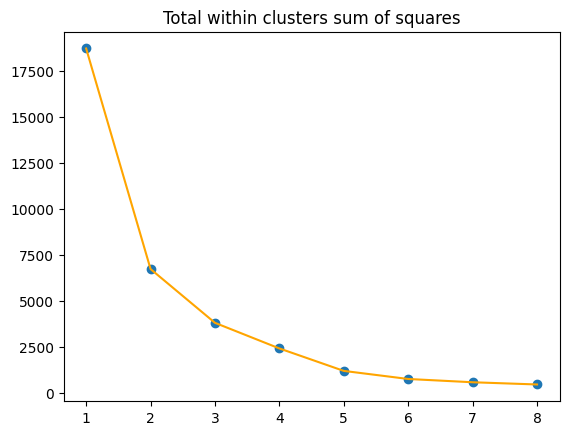

In [22]:
wss = np.zeros(8)
for k in range(8):
    kmeans = KMeans(n_clusters=k+1, n_init = 20, max_iter=10,
            init = 'random', random_state=42).fit(X)
    wss[k] = kmeans.inertia_ 
plt.scatter(np.arange(8)+1, wss)
plt.plot(np.arange(8) + 1, wss, linestyle='-', color='orange', label='Connecting line')

plt.title("Total within clusters sum of squares")
plt.show()

### By silhoutte

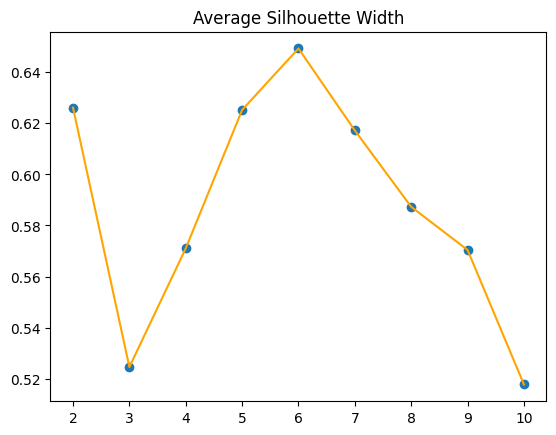

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples

asw = np.zeros(9)
for k in range(1,10):
  kmeans = KMeans(n_clusters=k+1, n_init = 20, max_iter=10,
                  init = 'random', random_state=2).fit(X)
  asw[k-1] = silhouette_score(X, kmeans.labels_)

plt.clf()    
plt.scatter(np.arange(1,10)+1, asw)
plt.plot(np.arange(9)+2, asw, linestyle='-', color='orange', label='Connecting line')

plt.title("Average Silhouette Width")
plt.show()

In [24]:
from matplotlib import colormaps


In [28]:
optimal_k = 6
cmap = plt.get_cmap("tab10")
cluster_colors = [cmap(i % 10) for i in range(optimal_k)]  # Lista de colores

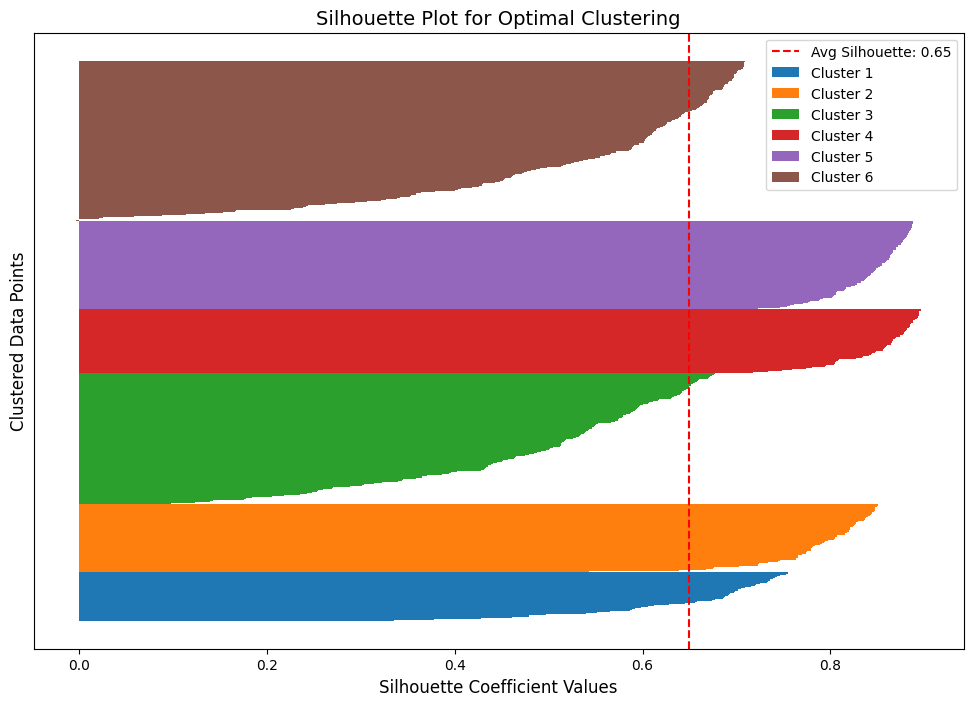

In [31]:

kmeans = km_100_6
labels = kmeans.labels_

# Calcular valores de silueta para cada punto
silhouette_vals = silhouette_samples(X, labels)
cmap = colormaps["tab10"]
# Crear Silhouette Plot
y_lower = 0
plt.figure(figsize=(12, 8))

for i in range(optimal_k):
    # Filtrar valores de silueta por cluster
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)

    # Dibujar barras horizontales
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', color=cluster_colors[i], height=1, label=f'Cluster {i+1}')
    y_lower = y_upper

# Línea de referencia para la media del coeficiente de silueta
avg_silhouette = np.mean(silhouette_vals)
plt.axvline(avg_silhouette, color="red", linestyle="--", label=f'Avg Silhouette: {avg_silhouette:.2f}')

# Configuración del gráfico
plt.title("Silhouette Plot for Optimal Clustering", fontsize=14)
plt.xlabel("Silhouette Coefficient Values", fontsize=12)
plt.ylabel("Clustered Data Points", fontsize=12)
plt.yticks([])  # Ocultar ticks del eje Y
plt.legend(loc='best')
plt.grid(False)
plt.show()

<Figure size 1800x1800 with 0 Axes>

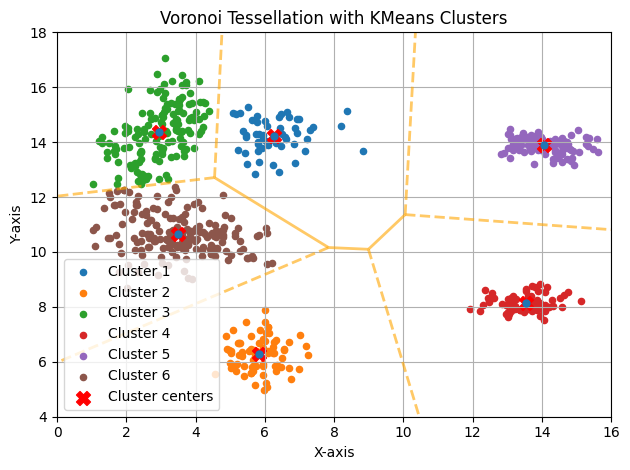

In [30]:
plot_voronoi(km_100_6,cluster_colors)

# Image reduction with k-means 

## Load the image

In [32]:
import imageio.v2 as imageio

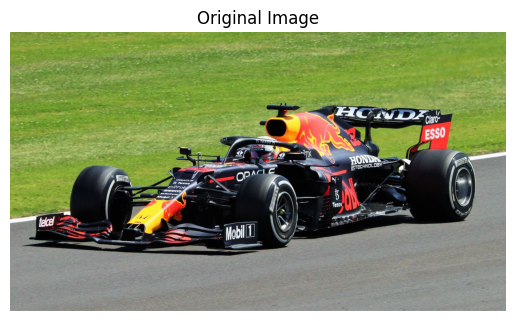

In [33]:
image = imageio.imread('./img/f1_max.jpg')
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

## Convert the image into a RGB matrix 

In [34]:
pixels = image.reshape(-1, 3)

In [35]:
print(pixels[:5])

[[131 150  60]
 [128 147  57]
 [132 153  62]
 [134 155  64]
 [126 149  58]]


## Apply k-means to cluster pixels by color

In [36]:
km_image = KMeans(n_clusters=4, n_init = 100, max_iter = 10,
            init = 'random', random_state=42).fit(pixels)

In [37]:
np.unique(km_image.labels_)

array([0, 1, 2, 3])

In [38]:
km_image.cluster_centers_

array([[232.75308354, 217.50503367, 185.43409561],
       [ 19.68062165,  19.23438335,  23.22971993],
       [144.20697832, 143.57738791, 139.43506076],
       [131.94682067, 157.0236822 ,  64.49779331]])

In [39]:
compressed_pixels = np.array([km_image.cluster_centers_[label] for label in km_image.labels_])
compressed_pixels = compressed_pixels.reshape(image.shape).astype('uint8')

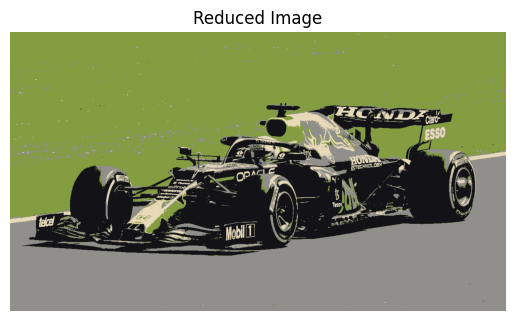

In [40]:
plt.imshow(compressed_pixels)
plt.grid(False)
plt.title("Reduced Image")
plt.axis('off')
plt.show()

### Color grid 

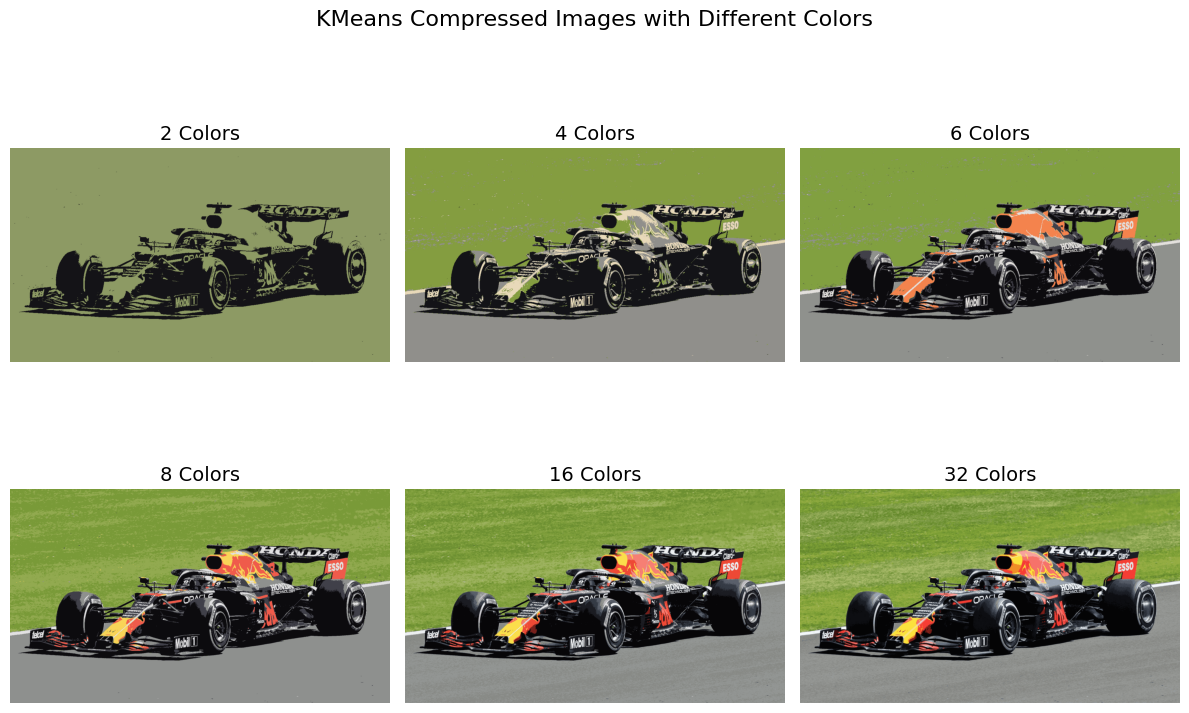

In [41]:
n_colors = [2, 4, 6, 8, 16, 32]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()  

for i, n in enumerate(n_colors):
    km_image = KMeans(n_clusters=n, n_init=10, max_iter=300, random_state=42).fit(pixels)
    compressed_pixels = np.array([km_image.cluster_centers_[label] for label in km_image.labels_])
    compressed_pixels = compressed_pixels.reshape(image.shape).astype('uint8')

    axes[i].imshow(compressed_pixels)
    axes[i].axis('off')  # Ocultar ejes
    axes[i].set_title(f"{n} Colors", fontsize=14)

# Ajustar diseño
plt.tight_layout()
plt.suptitle("KMeans Compressed Images with Different Colors", fontsize=16, y=1.02)
plt.show()